# Extract DeepCell ARK-Example sample data

Sample data sourced from the Angelo Lab's `ark_example` [dataset](https://huggingface.co/datasets/angelolab/ark_example). Specifically, [this version](https://huggingface.co/datasets/angelolab/ark_example/blob/8affc79/data/image_data.zip) of `image_data.zip`.

Assumes that the input.tiff files are already present, from running their [1_Segment_Image_Data](https://github.com/angelolab/ark-analysis/blob/bfc53b7d6f7bdf96ef95dd03ea84f9dfefc74dc9/templates/1_Segment_Image_Data.ipynb) notebook. These are provided on Cloud Storage. See also the [README](../sample-data/angelolab/README.md).

The Jupyter environment needs to be authorized to a valid Google user. Vertex AI notebooks should "just work". Jupyter started from the command line needs auth from the environment somehow. See also: [Google docs](https://googleapis.dev/python/google-api-core/latest/auth.html).

In [1]:
input_path_template = 'gs://davids-genomics-data-public/cellular-segmentation/deep-cell/angelolab-ark-example/ark-example-%s/input.tiff'
output_path_template = '../sample-data/angelolab/ark-example-%s/input_channels.npz'

In [2]:
# Save the channels.
import numpy as np
from pathlib import Path
from smart_open import open
import tifffile

for sample_index in range(11):
    input_path = input_path_template % sample_index

    # smart_open can handle files, URLs, Google Cloud Storage, Amazon S3, etc.
    file = open(input_path, 'rb')

    tif = tifffile.TiffFile(file)

    # An array of shape [num_inputs, height, width] containing intensity of nuclear channel
    input_nuclear = tif.pages[0].asarray()

    # An array of shape [num_inputs, height, width] containing intensity of membrane channel
    input_membrane = tif.pages[1].asarray()

    tif.close()

    # Stack the nuclear & membrane channels together.
    input_channels = np.stack([input_nuclear, input_membrane], axis=-1)

    output_path = output_path_template % sample_index

    np.savez_compressed(output_path, input_channels=input_channels)

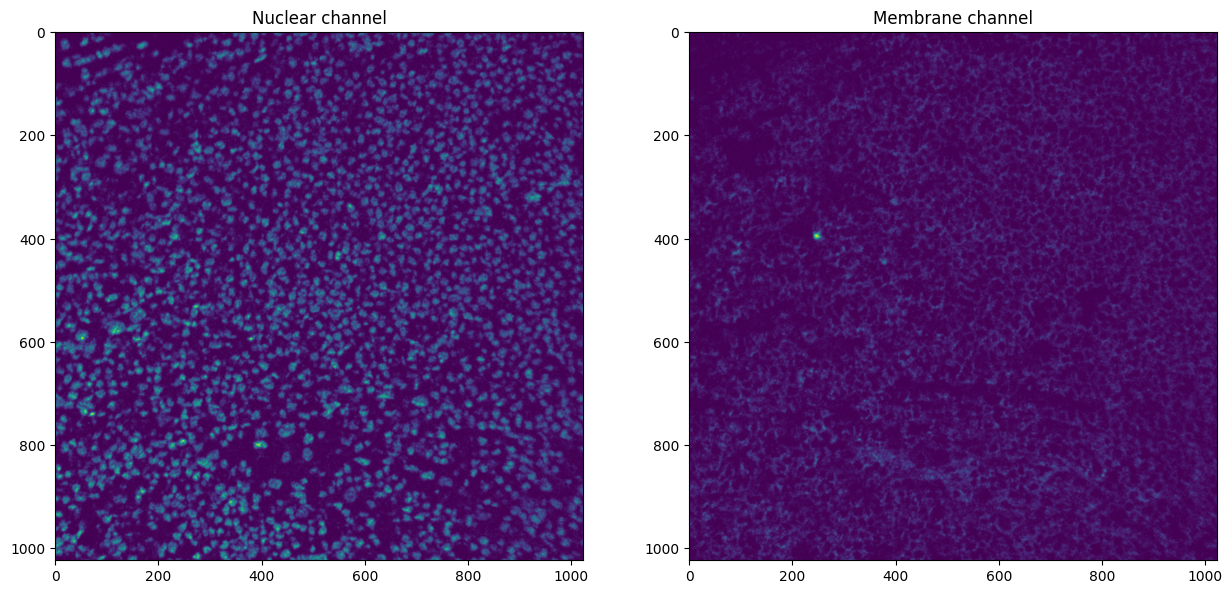

In [3]:
# Visualize 1 sample pair of nuclear/membrane channels
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(input_channels[..., 0])
ax[1].imshow(input_channels[..., 1])
ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
plt.show()